# Day 17: Convolutional Neural Networks (CNNs) - Image Classification Mastery

**Welcome to Day 17 of your ML journey!** Today we dive into one of the most revolutionary architectures in deep learning: **Convolutional Neural Networks (CNNs)**. Building on your solid PyTorch foundation from Day 16, you'll now learn to build models that can "see" and understand images with superhuman accuracy.

---

**Goal:** Master CNN architecture and build production-ready image classification systems using PyTorch.

**Topics Covered:**
- CNN architecture: convolution, pooling, and feature learning
- Building CNNs from scratch with PyTorch
- Image preprocessing and data augmentation
- Training CNNs on MNIST and CIFAR-10 datasets
- Feature visualization and model interpretation
- Advanced techniques: batch normalization, dropout, residual connections
- Transfer learning fundamentals
- Real-world applications and industry best practices

**Real-World Impact:** CNNs power everything from medical diagnosis to autonomous vehicles, social media filters to security systems. By the end of today, you'll understand the technology behind these applications and be able to build your own image recognition systems.

**Prerequisites:** Solid understanding of PyTorch fundamentals (Day 16), neural network basics (Day 15), and Python programming.


---

## 1. Concept Overview: Understanding CNNs

### What are Convolutional Neural Networks?

**Convolutional Neural Networks (CNNs)** are specialized neural networks designed to process data with a grid-like topology, such as images. They're inspired by the visual cortex of animals and are exceptionally effective at recognizing patterns in visual data.

<div align="center">
    <img src="Images/Convolutional Neural Network.jpeg" alt="Convolutional Neural Network Architecture showing input layer, convolutional layers, pooling layers, and fully connected layers" width="600" height="400">
    <br>
    <em id="figure1">Figure 1: CNN Architecture - From input image through convolutional layers, pooling, and fully connected layers to final classification</em>
</div>

**The Core Intuition:**
Think of CNNs like a team of specialized detectives examining a crime scene photo. Each detective (filter) looks for specific clues (features) - one might focus on edges, another on textures, another on shapes. They work together to piece together the complete picture.

**Why CNNs Excel at Images:**
1. **Spatial Relationships**: Preserves the 2D structure of images
2. **Parameter Sharing**: Same filters applied across the entire image
3. **Translation Invariance**: Recognizes objects regardless of position
4. **Hierarchical Learning**: Low-level features → High-level concepts

**Real-World Applications:**
- **Medical Imaging**: Detecting tumors, analyzing X-rays, diagnosing diseases
- **Autonomous Vehicles**: Recognizing traffic signs, pedestrians, other vehicles
- **Social Media**: Face recognition, content moderation, photo enhancement
- **Security**: Surveillance systems, biometric authentication
- **E-commerce**: Product recognition, visual search, quality control


### CNN Building Blocks Explained

The diagram above (<a href="#figure1">Figure 1</a>) shows a complete CNN architecture in action. Let's walk through each component and see how they work together to process images:

#### 1. **Convolutional Layers** (The Feature Detectors)
As shown in the diagram, convolutional layers are the heart of CNNs. These layers apply filters (kernels) to detect features:

**How Convolution Works (Visualized in the diagram):**
- **Input Image**: The diagram shows a raw image entering the network
- **Filter Application**: Small filters (e.g., 3×3) slide across the image, as illustrated by the convolution operation
- **Feature Maps**: Each filter produces a feature map highlighting specific patterns
- **Multiple Filters**: Notice how different filters detect different features (edges, textures, patterns)

**Key Parameters (Visible in the architecture):**
- **Filter Size**: Typically 3×3 or 5×5 (larger = more context)
- **Stride**: How many pixels the filter moves (1 = every pixel, 2 = every other pixel)
- **Padding**: Adding zeros around the image to preserve size
- **Number of Filters**: More filters = more feature types detected (see the multiple feature maps in the diagram)

#### 2. **Activation Functions** (The Non-linearity Injectors)
Between convolutional layers, activation functions introduce non-linearity:
- **ReLU (Rectified Linear Unit)**: Most common, f(x) = max(0, x)
- **Leaky ReLU**: Fixes "dying ReLU" problem
- **ELU**: Smooth alternative with better gradient flow

*Note: In the diagram, activation functions are applied after each convolutional layer, though not explicitly shown.*

#### 3. **Pooling Layers** (The Dimension Reducers)
The diagram clearly shows pooling layers reducing spatial dimensions while preserving important information:
- **Max Pooling**: Takes maximum value in each region (most common) - visible as the downsampling in the diagram
- **Average Pooling**: Takes average value in each region
- **Benefits**: Reduces overfitting, computational cost, and parameters (notice how the feature maps get smaller)

#### 4. **Fully Connected Layers** (The Final Classifiers)
The diagram shows the transition from 2D feature maps to 1D vectors for final classification:
- **Flattening**: Feature maps are flattened into vectors (visible in the diagram)
- **Dense Layers**: Perform final classification or regression
- **Output**: Produces the final prediction (shown as the output layer)


### How Convolution Works: A Deep Dive

**The Convolution Operation:**
Convolution is a mathematical operation that combines two functions to produce a third function. In CNNs, we use discrete convolution:

<div style="background:rgb(10, 10, 7); border-left: 4px solid #667eea; padding: 20px; margin: 20px 0; border-radius: 8px;">
    <h4 style="color: #667eea; margin-top: 0;"> Mathematical Formula</h4>
    <div style="background: rgb(231, 231, 55); padding: 15px; border-radius: 5px; text-align: center; font-family: monospace; font-size: 16px; border: rgb(0, 0, 0);">
        <strong style="color: black;">Output[i,j] = Σ Σ Input[i+m, j+n] × Filter[m, n]</strong><br>
        <span style="color:rgb(56, 240, 56); font-size: 14px;">where m, n are filter dimensions</span>
    </div>
</div>

**Step-by-Step Process (<a href="#figure2">Figure 2</a>):**
1. **Place Filter**: Position the filter over a region of the input (red highlighted area)
2. **Element-wise Multiply**: Multiply corresponding elements (yellow calculation box)
3. **Sum Results**: Add all products together (shown in yellow box)
4. **Store Output**: Place result in corresponding position of output (feature map)
5. **Slide Filter**: Move filter to next position and repeat (sequential red highlights)

**Feature Detection Examples:**
- **Edge Detection**: Filters that detect horizontal, vertical, diagonal edges
- **Texture Detection**: Filters that identify patterns like wood grain, fabric
- **Shape Detection**: Filters that recognize circles, squares, triangles
- **Color Patterns**: Filters that detect specific color combinations

**Hierarchical Learning:**
- **Layer 1**: Detects edges, corners, basic shapes
- **Layer 2**: Combines edges into textures, simple shapes
- **Layer 3**: Recognizes object parts (eyes, wheels, doors)
- **Layer 4+**: Identifies complete objects (faces, cars, buildings)

<div align="center">
    <img src="Images/3×3 filter sliding across a 5×5 image.png" 
         alt="Step-by-step convolution demonstration showing 3x3 filter sliding across input image" 
         width="700" height="500">
    <br>
    <em id="figure2">Figure 2: Convolution Operation - 3×3 filter sliding across input with element-wise multiplication and summation</em>
</div>


### Pooling and Dimensionality Reduction

**Why Pooling is Essential:**
Pooling layers serve multiple critical purposes in CNNs:

1. **Dimensionality Reduction**: Reduces spatial size of feature maps
2. **Translation Invariance**: Makes the network robust to small shifts
3. **Computational Efficiency**: Reduces parameters and computation
4. **Overfitting Prevention**: Acts as a form of regularization

**Max Pooling (Most Common):**
- Takes the maximum value in each pooling region
- Preserves the strongest activation (most important feature)
- Commonly uses 2×2 pooling with stride 2
- Reduces spatial dimensions by half

**Average Pooling:**
- Takes the average value in each pooling region
- Smoother output, less sensitive to outliers
- Sometimes used in final layers for global pooling

**Global Pooling:**
- Reduces entire feature map to single value
- Global Average Pooling (GAP) popular in modern architectures
- Eliminates need for fully connected layers

**Spatial Invariance Benefits:**
- Object recognition regardless of exact position
- Robustness to small translations and rotations
- Better generalization to new data

<div align="center">
    <img src="Images/Max Pooling vs Average Pooling.png" 
         alt="Step-by-step convolution demonstration showing 3x3 filter sliding across input image" 
         width="700" height="500">
    <br>
    <em>Figure 2: Max Pooling Vs Average Pooling</em>
</div>



---

## 2. Code Demo: Building CNNs with PyTorch

Let's dive into practical implementation! We'll start with a simple CNN and progressively build more sophisticated architectures.


In [10]:
# Import essential libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets  # ← This line imports datasets

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tqdm import tqdm
import time

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Configure matplotlib
plt.style.use('default')
sns.set_palette("husl")

# Check PyTorch version and device availability
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device: {torch.cuda.get_device_name(0)}")
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
    print("Using CPU")

print(f"Device: {device}")

PyTorch version: 2.9.0+cpu
CUDA available: False
Using CPU
Device: cpu


### 2.2 Dataset Loading and Exploration

Let's start with the MNIST dataset - a classic benchmark for image classification. MNIST contains 70,000 grayscale images of handwritten digits (0-9), each 28×28 pixels.


In [11]:
import torchvision.transforms as transforms

# Define data transformations
# Convert PIL images to tensors and normalize pixel values to [0,1]
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL Image to tensor and scale to [0,1]
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1,1] range
])

# Load MNIST dataset
print("Loading MNIST dataset...")
train_dataset = datasets.MNIST(
    root='./data', 
    train=True, 
    download=True, 
    transform=transform
)

test_dataset = datasets.MNIST(
    root='./data', 
    train=False, 
    download=True, 
    transform=transform
)

# Create data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Training samples: {len(train_dataset)}")
print(f"Test samples: {len(test_dataset)}")
print(f"Image shape: {train_dataset[0][0].shape}")
print(f"Number of classes: {len(train_dataset.classes)}")
print(f"Classes: {train_dataset.classes}")


Loading MNIST dataset...


100%|██████████| 9.91M/9.91M [00:01<00:00, 8.15MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 175kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.51MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 291kB/s]


Training samples: 60000
Test samples: 10000
Image shape: torch.Size([1, 28, 28])
Number of classes: 10
Classes: ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


Sample images from MNIST training set:


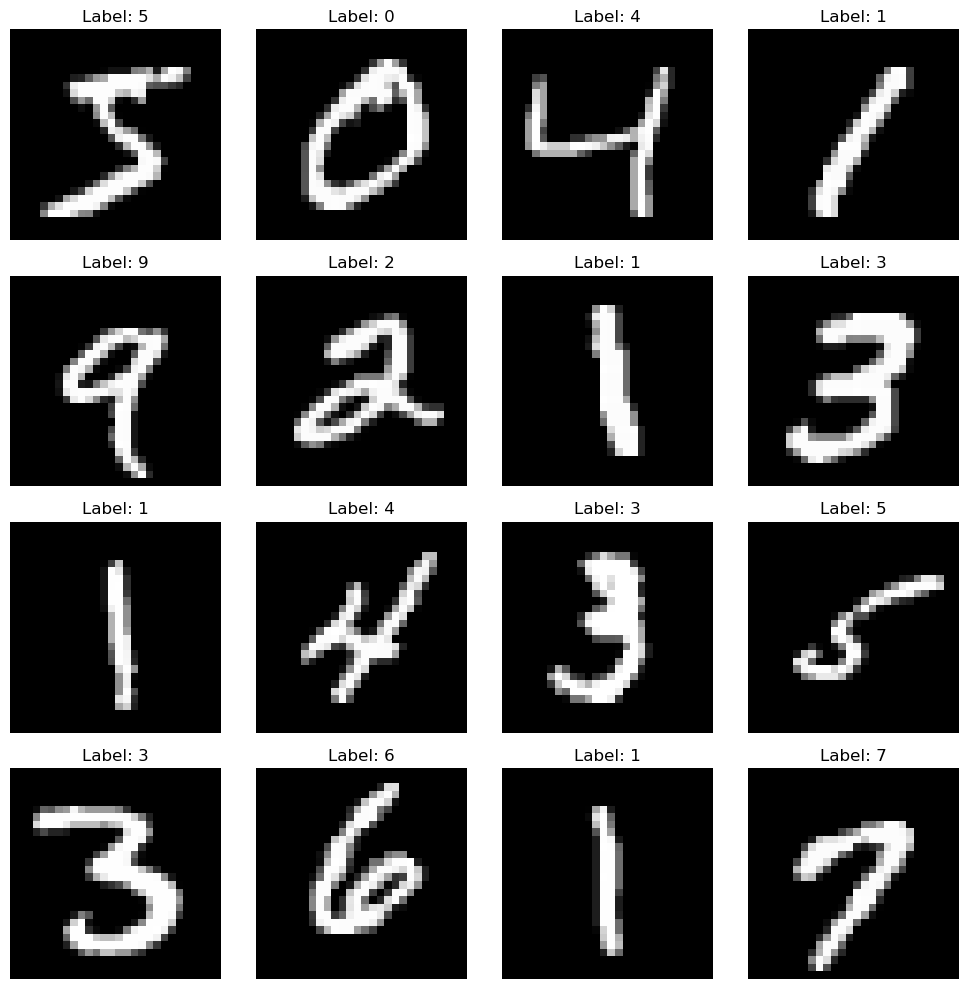

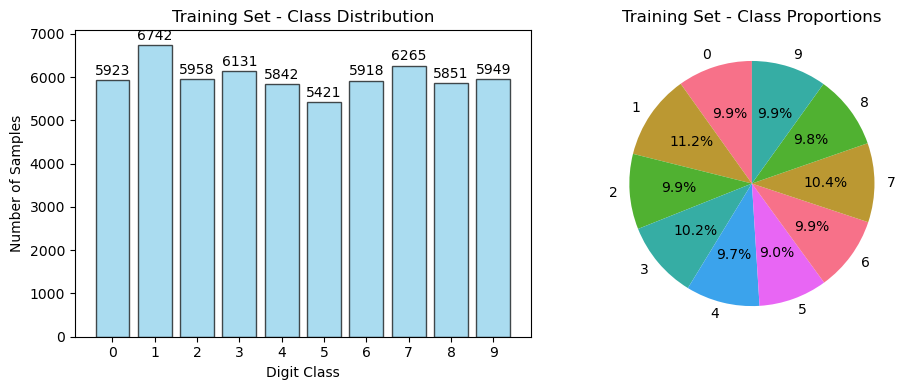


Training Set Statistics:
Digit 0: 5,923 samples (9.9%)
Digit 1: 6,742 samples (11.2%)
Digit 2: 5,958 samples (9.9%)
Digit 3: 6,131 samples (10.2%)
Digit 4: 5,842 samples (9.7%)
Digit 5: 5,421 samples (9.0%)
Digit 6: 5,918 samples (9.9%)
Digit 7: 6,265 samples (10.4%)
Digit 8: 5,851 samples (9.8%)
Digit 9: 5,949 samples (9.9%)


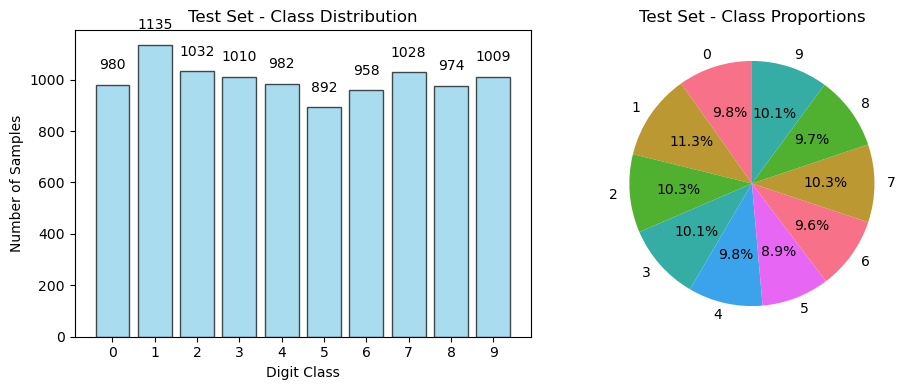


Test Set Statistics:
Digit 0: 980 samples (9.8%)
Digit 1: 1,135 samples (11.3%)
Digit 2: 1,032 samples (10.3%)
Digit 3: 1,010 samples (10.1%)
Digit 4: 982 samples (9.8%)
Digit 5: 892 samples (8.9%)
Digit 6: 958 samples (9.6%)
Digit 7: 1,028 samples (10.3%)
Digit 8: 974 samples (9.7%)
Digit 9: 1,009 samples (10.1%)


In [12]:
# Visualize sample images from the dataset
def visualize_samples(dataset, num_samples=16):
    """Visualize sample images from the dataset"""
    fig, axes = plt.subplots(4, 4, figsize=(10, 10))
    axes = axes.ravel()
    
    for i in range(num_samples):
        image, label = dataset[i]
        # Denormalize image for visualization
        image = image * 0.5 + 0.5  # Convert from [-1,1] back to [0,1]
        
        axes[i].imshow(image.squeeze(), cmap='gray')
        axes[i].set_title(f'Label: {label}', fontsize=12)
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize training samples
print("Sample images from MNIST training set:")
visualize_samples(train_dataset)

# Analyze class distribution
def analyze_class_distribution(dataset, title):
    """Analyze and visualize class distribution"""
    labels = [dataset[i][1] for i in range(len(dataset))]
    unique, counts = np.unique(labels, return_counts=True)
    
    plt.figure(figsize=(10, 4))
    
    # Bar plot
    plt.subplot(1, 2, 1)
    bars = plt.bar(unique, counts, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f'{title} - Class Distribution')
    plt.xlabel('Digit Class')
    plt.ylabel('Number of Samples')
    plt.xticks(unique)
    
    # Add count labels on bars
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
                str(count), ha='center', va='bottom')
    
    # Pie chart
    plt.subplot(1, 2, 2)
    plt.pie(counts, labels=unique, autopct='%1.1f%%', startangle=90)
    plt.title(f'{title} - Class Proportions')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n{title} Statistics:")
    for digit, count in zip(unique, counts):
        print(f"Digit {digit}: {count:,} samples ({count/len(dataset)*100:.1f}%)")

# Analyze both training and test sets
analyze_class_distribution(train_dataset, "Training Set")
analyze_class_distribution(test_dataset, "Test Set")


### 2.3 Building a Simple CNN from Scratch

Let's create our first CNN! We'll build a simple but effective architecture with two convolutional layers, followed by pooling and fully connected layers.


In [13]:
class SimpleCNN(nn.Module):
    """
    A simple CNN for MNIST digit classification.
    Architecture: Conv2d → ReLU → MaxPool → Conv2d → ReLU → MaxPool → Flatten → FC → ReLU → Dropout → FC
    """
    
    def __init__(self, num_classes=10):
        super(SimpleCNN, self).__init__()
        
        # First convolutional block
        # Input: 1 channel (grayscale), Output: 32 feature maps
        # Kernel size 3x3, padding 1 to preserve spatial dimensions
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)  # Reduces 28x28 to 14x14
        
        # Second convolutional block
        # Input: 32 channels, Output: 64 feature maps
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)  # Reduces 14x14 to 7x7
        
        # Calculate the size after conv and pooling layers
        # 28x28 → 14x14 → 7x7, so 7*7*64 = 3136 features
        self.fc1 = nn.Linear(7 * 7 * 64, 128)  # First fully connected layer
        self.dropout = nn.Dropout(0.5)  # Dropout for regularization
        self.fc2 = nn.Linear(128, num_classes)  # Output layer (10 classes for MNIST)
        
    def forward(self, x):
        """Forward pass through the network"""
        # First conv block: 1x28x28 → 32x28x28 → 32x14x14
        x = self.pool1(F.relu(self.conv1(x)))
        
        # Second conv block: 32x14x14 → 64x14x14 → 64x7x7
        x = self.pool2(F.relu(self.conv2(x)))
        
        # Flatten for fully connected layers: 64x7x7 → 3136
        x = x.view(x.size(0), -1)
        
        # Fully connected layers: 3136 → 128 → 10
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

# Create model instance and move to device
model = SimpleCNN(num_classes=10).to(device)

# Print model architecture
print("Simple CNN Architecture:")
print(model)

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\nTotal parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

# Print layer-wise parameter count
print("\nLayer-wise Parameter Count:")
for name, param in model.named_parameters():
    print(f"{name}: {param.numel():,} parameters")


Simple CNN Architecture:
SimpleCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

Total parameters: 421,642
Trainable parameters: 421,642

Layer-wise Parameter Count:
conv1.weight: 288 parameters
conv1.bias: 32 parameters
conv2.weight: 18,432 parameters
conv2.bias: 64 parameters
fc1.weight: 401,408 parameters
fc1.bias: 128 parameters
fc2.weight: 1,280 parameters
fc2.bias: 10 parameters


### 2.4 Training Setup and Configuration


In [15]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  # Adam optimizer with L2 regularization

# Learning rate scheduler - reduces learning rate when validation loss plateaus
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=5
)

# Training configuration
num_epochs = 10
print_every = 100  # Print progress every 100 batches

print("Training Configuration:")
print(f"Loss function: {criterion}")
print(f"Optimizer: {optimizer}")
print(f"Learning rate: {optimizer.param_groups[0]['lr']}")
print(f"Number of epochs: {num_epochs}")
print(f"Batch size: {batch_size}")

# Initialize lists to store training history
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
learning_rates = []


Training Configuration:
Loss function: CrossEntropyLoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0.0001
)
Learning rate: 0.001
Number of epochs: 10
Batch size: 64
